In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train', 'test', 'sample_submission.csv']


In [55]:
import os
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms

#For converting the dataset to torchvision dataset format
class VowelConsonantDataset(Dataset):
    def __init__(self, file_path,train=True,transform=None):
        self.transform = transform
        self.file_path=file_path
        self.train=train
        self.file_names=[file for _,_,files in os.walk(self.file_path) for file in files]
        self.len = len(self.file_names)
        if self.train:
            self.classes_mapping=self.get_classes()
    def __len__(self):
        return len(self.file_names)
    
    def __getitem__(self, index):
        file_name=self.file_names[index]
        image_data=self.pil_loader(self.file_path+"/"+file_name)
        if self.transform:
            image_data = self.transform(image_data)
        if self.train:
            file_name_splitted=file_name.split("_")
            Y1 = self.classes_mapping[file_name_splitted[0]]
            Y2 = self.classes_mapping[file_name_splitted[1]]
            z1,z2=torch.zeros(10),torch.zeros(10)
            z1[Y1-10],z2[Y2]=1,1
            label=torch.stack([z1,z2])

            return image_data, label

        else:
            return image_data, file_name
          
    def pil_loader(self,path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')

      
    def get_classes(self):
        classes=[]
        for name in self.file_names:
            name_splitted=name.split("_")
            classes.extend([name_splitted[0],name_splitted[1]])
        classes=list(set(classes))
        classes_mapping={}
        for i,cl in enumerate(sorted(classes)):
            classes_mapping[cl]=i
        return classes_mapping

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets

import torchvision.transforms as transforms

import numpy as np
import pandas as pd

train_on_gpu = torch.cuda.is_available()

In [57]:
transform = transforms.Compose([
    transforms.ToTensor()])

In [58]:
full_data = VowelConsonantDataset("../input/train/train",train=True,transform=transform)
train_size = int(0.9 * len(full_data))
test_size = len(full_data) - train_size

train_data, validation_data = random_split(full_data, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=60, shuffle=True)

In [59]:
len(train_loader)

141

In [75]:
test_data = VowelConsonantDataset("../input/test/test",train=False,transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=60,shuffle=False)

(64, 64, 3)
(64, 64, 3)


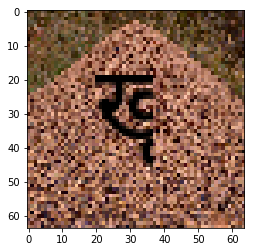

In [99]:
for data in train_loader:
    img,lab = data
    im = np.transpose(img[0].numpy(),(1,2,0))
    
    print(im.shape)
    im = np.squeeze(im)
    print(im.shape)
    plt.imshow(im,)
   # print(img.shape,lab[0])
    break

In [62]:
full_data.get_classes()

{'C0': 0,
 'C1': 1,
 'C2': 2,
 'C3': 3,
 'C4': 4,
 'C5': 5,
 'C6': 6,
 'C7': 7,
 'C8': 8,
 'C9': 9,
 'V0': 10,
 'V1': 11,
 'V2': 12,
 'V3': 13,
 'V4': 14,
 'V5': 15,
 'V6': 16,
 'V7': 17,
 'V8': 18,
 'V9': 19}

In [63]:
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from tqdm import tqdm_notebook

In [64]:
model_v = models.resnet18()
model_c = models.resnet18()

In [65]:
print(model_c)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [66]:

model_c.fc = nn.Linear(512,10,bias=True)
model_v.fc = nn.Linear(512,10,bias=True)
print(model_c)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [67]:
opt_v = optim.Adam(model_v.parameters())
opt_c = optim.Adam(model_c.parameters())
loss_fn_v = nn.CrossEntropyLoss()
loss_fn_c =  nn.CrossEntropyLoss()

In [68]:
print(lab[:,0,:],torch.max(lab[:,0,:],1))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],


In [71]:
max_epochs = 10
loss_arr= []
st='cuda:0'
model_v.to(st)
model_c.to(st)

for i in tqdm_notebook(range(max_epochs),total=max_epochs,unit='epochs'):
    for data in tqdm_notebook(train_loader,total=len(train_loader),unit='batch'):
        img,lab = data
        img,lab = img.to(st),lab.to(st)
        out_v = model_v(img)
        out_c = model_c(img)
        
        opt_v.zero_grad()
        opt_c.zero_grad()
        val,ind = torch.max(lab[:,0,:],1)
        val,ind1 = torch.max(lab[:,1,:],1)
        lab_v = ind
        lab_c = ind1
        loss = loss_fn_v(out_v,lab_v)+loss_fn_c(out_c,lab_c)
        
        loss.backward()
        opt_v.step()
        opt_c.step()
        del img,lab
        
    print(loss)
    loss_arr.append(loss)        
        

tensor(0.1225, device='cuda:0', grad_fn=<AddBackward0>)


tensor(0.6479, device='cuda:0', grad_fn=<AddBackward0>)


tensor(0.4795, device='cuda:0', grad_fn=<AddBackward0>)


tensor(0.0487, device='cuda:0', grad_fn=<AddBackward0>)


tensor(0.4106, device='cuda:0', grad_fn=<AddBackward0>)


tensor(0.1791, device='cuda:0', grad_fn=<AddBackward0>)


tensor(0.3026, device='cuda:0', grad_fn=<AddBackward0>)


tensor(0.0265, device='cuda:0', grad_fn=<AddBackward0>)


tensor(0.0710, device='cuda:0', grad_fn=<AddBackward0>)


tensor(0.3938, device='cuda:0', grad_fn=<AddBackward0>)


In [ ]:
print(net)


In [ ]:
torch.max(lab[:,0,:]).int()

In [97]:
def evaluation(dataloader,m1,m2):
    total=0
    v=0
    c=0
    for data in tqdm_notebook(dataloader,total=len(dataloader),unit='batch'):
        img,lab = data
        img,lab = img.to(st),lab.to(st)
        _,out_v = torch.max(m1(img),1)
        _,out_c = torch.max(m2(img),1)
        _,lab1 = torch.max(lab[:,0,:],1)
        _,lab2 = torch.max(lab[:,1,:],1)
        total += 64
        v += (out_v==lab1).sum().item()
        c += (out_c==lab2).sum().item()
    print('total images:',total)
    print('correct vowels predictions:',v)
    print('correct consonants predictions:',c)
    print('Vowel Accuracy: ',(v/total)*100, '%')
    print('Consonants Accuracy: ',(c/total)*100,'%')
        
        
evaluation(train_loader,model_v,model_c)
    

total images: 9024
correct vowels predictions: 8688
correct consonants predictions: 8816
Vowel Accuracy:  96.27659574468085 %
Consonants Accuracy:  97.69503546099291 %
